<a href="https://colab.research.google.com/github/Abhilash11Addanki/DeepLearning/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-05-09 13:13:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.81.208, 142.250.73.208, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.81.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   111MB/s    in 0.6s    

2021-05-09 13:13:58 (111 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [5]:
train_cat_names = os.listdir(train_cats_dir)
train_dog_names = os.listdir(train_dogs_dir)
test_cat_names = os.listdir(test_cats_dir)
test_dog_names = os.listdir(test_dogs_dir)

print(train_cat_names[:10])
print(train_dog_names[:10])

['cat.924.jpg', 'cat.727.jpg', 'cat.438.jpg', 'cat.511.jpg', 'cat.971.jpg', 'cat.90.jpg', 'cat.506.jpg', 'cat.433.jpg', 'cat.417.jpg', 'cat.847.jpg']
['dog.328.jpg', 'dog.833.jpg', 'dog.566.jpg', 'dog.720.jpg', 'dog.209.jpg', 'dog.787.jpg', 'dog.712.jpg', 'dog.445.jpg', 'dog.902.jpg', 'dog.954.jpg']


In [6]:
print('total training cat images :', len(train_cat_names))
print('total training dog images :', len(train_dog_names))

print('total validation cat images :', len(test_cat_names))
print('total validation dog images :', len(test_dog_names))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

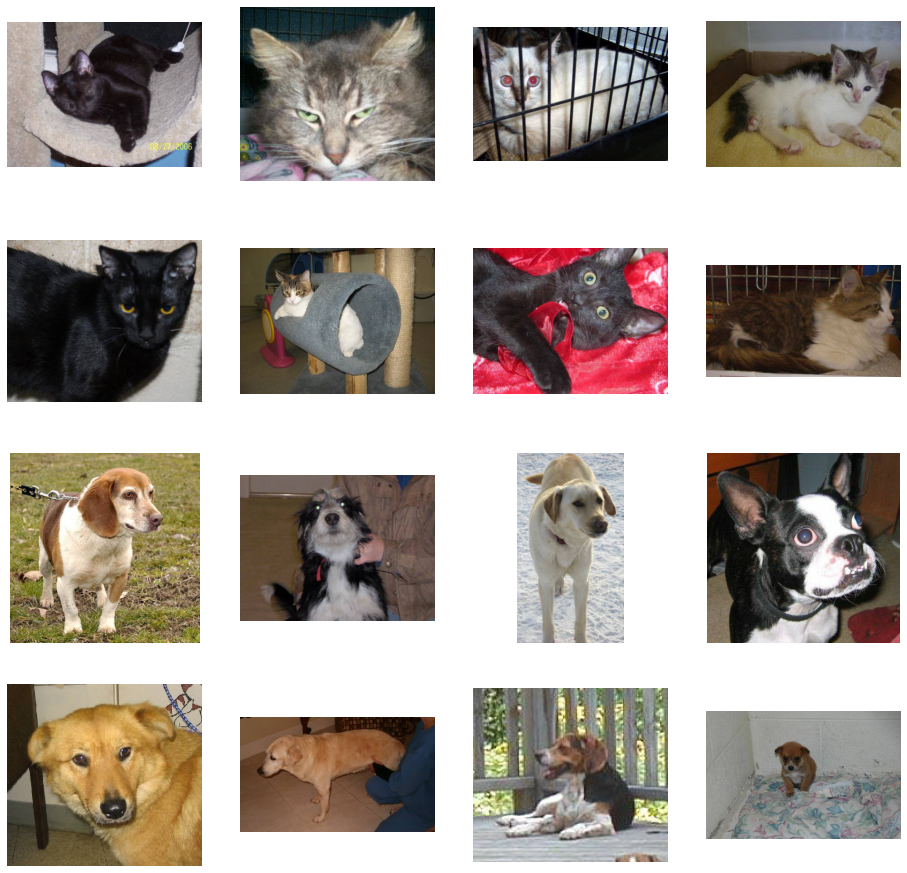

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_names[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_names[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size = 128,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size = 32,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>0.99:
      print("\nReached 99% Accuracy so training cancelled!")
      self.model.stop_training = True

In [14]:
history = model.fit(train_generator,validation_data = test_generator,epochs = 50,callbacks=[myCallback()])

Epoch 1/50
16/16 [==============================] - 43s 590ms/step - loss: 0.7416 - accuracy: 0.4978 - val_loss: 0.6870 - val_accuracy: 0.5900
Epoch 2/50
16/16 [==============================] - 8s 512ms/step - loss: 0.6897 - accuracy: 0.5172 - val_loss: 0.6777 - val_accuracy: 0.5180
Epoch 3/50
16/16 [==============================] - 8s 518ms/step - loss: 0.6768 - accuracy: 0.5587 - val_loss: 0.7016 - val_accuracy: 0.5030
Epoch 4/50
16/16 [==============================] - 8s 514ms/step - loss: 0.6820 - accuracy: 0.5648 - val_loss: 0.6330 - val_accuracy: 0.6590
Epoch 5/50
16/16 [==============================] - 8s 511ms/step - loss: 0.6307 - accuracy: 0.6427 - val_loss: 0.5950 - val_accuracy: 0.6870
Epoch 6/50
16/16 [==============================] - 8s 510ms/step - loss: 0.5786 - accuracy: 0.6876 - val_loss: 0.5938 - val_accuracy: 0.6780
Epoch 7/50
16/16 [==============================] - 8s 506ms/step - loss: 0.5220 - accuracy: 0.7420 - val_loss: 0.5467 - val_accuracy: 0.7160
Epoch

In [15]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving dog1.jpeg to dog1.jpeg
Saving dog.jpg to dog.jpg
Saving cat1.jpeg to cat1.jpeg
Saving cat.jpg to cat.jpg
[1.]
dog1.jpeg is a dog
[0.]
dog.jpg is a cat
[0.]
cat1.jpeg is a cat
[1.]
cat.jpg is a dog


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


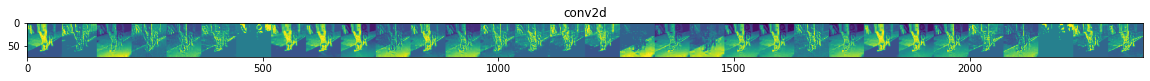

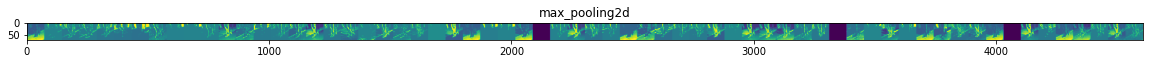

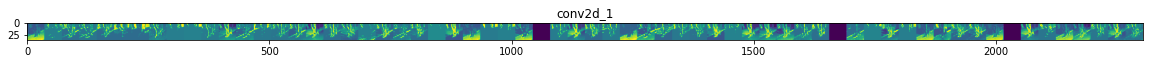

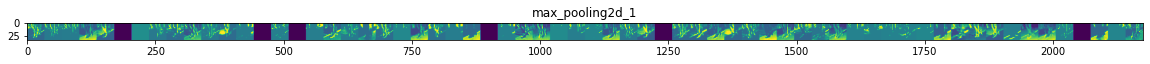

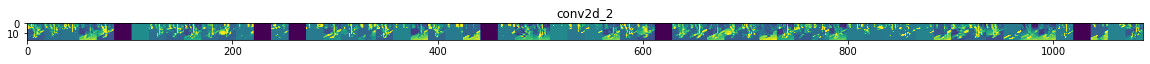

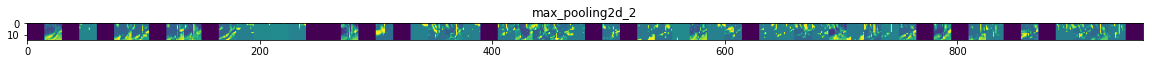

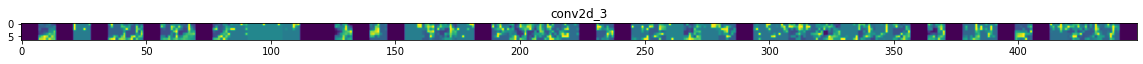

In [16]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_names]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_names]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

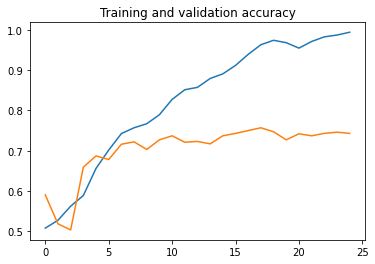

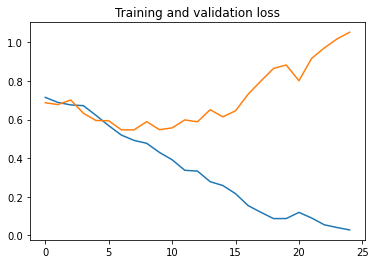

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#Plotting training and validation accuracy per epoch
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('Training and validation accuracy')
plt.figure()

#Plotting training and validation loss per epoch
plt.plot( epochs,loss)
plt.plot( epochs,val_loss)
plt.title('Training and validation loss')

**Using Image Augmentation**

In [18]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

In [19]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [21]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
train_datagen = ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size = 128,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size = 32,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
class myCallbackAug(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>0.9:
      print("\nReached 90% Accuracy so training cancelled!")
      self.model.stop_training = True

In [24]:
history_aug = model1.fit(train_generator,validation_data = test_generator,epochs = 100,callbacks=[myCallbackAug()])

Epoch 1/100
16/16 [==============================] - 17s 1s/step - loss: 0.7064 - accuracy: 0.5241 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/100
16/16 [==============================] - 16s 1s/step - loss: 0.6942 - accuracy: 0.4979 - val_loss: 0.6909 - val_accuracy: 0.5030
Epoch 3/100
16/16 [==============================] - 16s 1s/step - loss: 0.6922 - accuracy: 0.5326 - val_loss: 0.6854 - val_accuracy: 0.5140
Epoch 4/100
16/16 [==============================] - 16s 1s/step - loss: 0.6855 - accuracy: 0.5509 - val_loss: 0.6727 - val_accuracy: 0.5860
Epoch 5/100
16/16 [==============================] - 16s 1s/step - loss: 0.6781 - accuracy: 0.5813 - val_loss: 0.6632 - val_accuracy: 0.5750
Epoch 6/100
16/16 [==============================] - 16s 1s/step - loss: 0.6754 - accuracy: 0.5744 - val_loss: 0.6839 - val_accuracy: 0.5280
Epoch 7/100
16/16 [==============================] - 16s 1s/step - loss: 0.6880 - accuracy: 0.5303 - val_loss: 0.6715 - val_accuracy: 0.6250
Epoch 8/100
1

In [40]:
uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model1.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving dog1.jpeg to dog1 (2).jpeg
Saving dog.jpg to dog (2).jpg
Saving cat1.jpeg to cat1 (2).jpeg
Saving cat.jpg to cat (2).jpg
[1.]
dog1.jpeg is a dog
[1.]
dog.jpg is a dog
[0.]
cat1.jpeg is a cat
[0.]
cat.jpg is a cat


Text(0.5, 1.0, 'Training and validation loss')

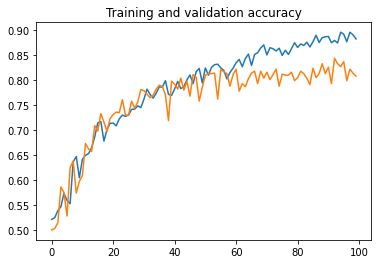

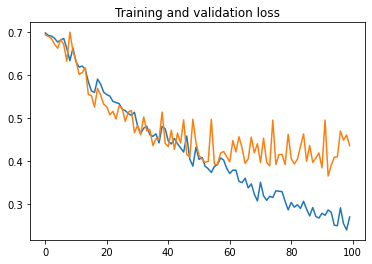

In [26]:
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#Plotting training and validation accuracy per epoch
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('Training and validation accuracy')
plt.figure()

#Plotting training and validation loss per epoch
plt.plot( epochs,loss)
plt.plot( epochs,val_loss)
plt.title('Training and validation loss')

**Using Transfer Learning**

In [27]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [28]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-05-09 13:50:49--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.12.240, 142.251.33.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   135MB/s    in 0.6s    

2021-05-09 13:50:50 (135 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [29]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [30]:
pre_trained_model = InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)

In [31]:
pre_trained_model.load_weights(local_weights_file)

In [32]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [33]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_8[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [34]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ',last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [35]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1,activation='sigmoid')(x)
model2 = Model(pre_trained_model.input,x)

In [36]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [37]:
class myCallbackTL(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>0.95:
      print("\n95% Accuracy Reached so training cancelled")
      self.model.stop_training = True

In [39]:
history_transfer_learning = model2.fit(train_generator,validation_data = test_generator,epochs = 50,callbacks=[myCallbackTL()])

Epoch 1/50
16/16 [==============================] - 22s 1s/step - loss: 1.1088 - accuracy: 0.7407 - val_loss: 0.2769 - val_accuracy: 0.9440
Epoch 2/50
16/16 [==============================] - 16s 1s/step - loss: 0.4577 - accuracy: 0.8982 - val_loss: 0.1268 - val_accuracy: 0.9620
Epoch 3/50
16/16 [==============================] - 16s 1s/step - loss: 0.2356 - accuracy: 0.9290 - val_loss: 0.1279 - val_accuracy: 0.9610
Epoch 4/50
16/16 [==============================] - 16s 1s/step - loss: 0.1717 - accuracy: 0.9333 - val_loss: 0.1164 - val_accuracy: 0.9560
Epoch 5/50
16/16 [==============================] - 16s 1s/step - loss: 0.1307 - accuracy: 0.9456 - val_loss: 0.0926 - val_accuracy: 0.9630
Epoch 6/50
16/16 [==============================] - 16s 1s/step - loss: 0.1388 - accuracy: 0.9491 - val_loss: 0.0902 - val_accuracy: 0.9650
Epoch 7/50
16/16 [==============================] - 16s 1s/step - loss: 0.1465 - accuracy: 0.9446 - val_loss: 0.0809 - val_accuracy: 0.9710
Epoch 8/50
16/16 [==

In [41]:
uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model2.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving dog1.jpeg to dog1 (3).jpeg
Saving dog.jpg to dog (3).jpg
Saving cat1.jpeg to cat1 (3).jpeg
Saving cat.jpg to cat (3).jpg
[1.]
dog1.jpeg is a dog
[1.]
dog.jpg is a dog
[1.]
cat1.jpeg is a dog
[1.]
cat.jpg is a dog


Text(0.5, 1.0, 'Training and validation loss')

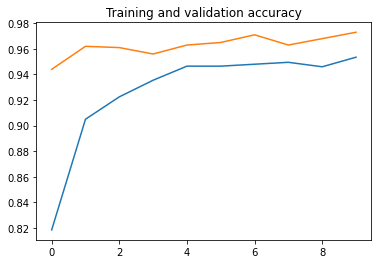

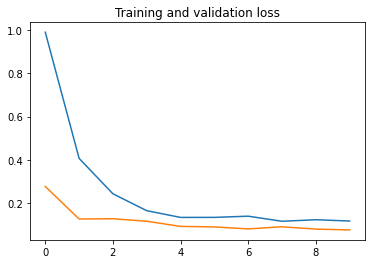

In [42]:
acc = history_transfer_learning.history['accuracy']
val_acc = history_transfer_learning.history['val_accuracy']
loss = history_transfer_learning.history['loss']
val_loss = history_transfer_learning.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#Plotting training and validation accuracy per epoch
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('Training and validation accuracy')
plt.figure()

#Plotting training and validation loss per epoch
plt.plot( epochs,loss)
plt.plot( epochs,val_loss)
plt.title('Training and validation loss')